<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

**Цель проекта**

Разработать метод преобразования персональных данных клиентов страховой компании «Хоть потоп» для их защиты, усложняющий восстановление персональной информации, и обосновать корректность его работы. При преобразовании качество моделей машинного обучения не должно ухудшаться (оценка качества проводится на основе метрики r2_score).

**Данные для анализа**

На анализ переданы данные клиентов:
1. Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
2. Целевой признак: количество страховых выплат клиенту за последние 5 лет.

**Шаги (план) проекта**

1.  Загрузка данных
2.  Умножение матриц
3.  Алгоритм преобразования
4.  Проверка алгоритма
5.  Итоговый вывод

## Загрузка данных

### Загрузка и изучение данных

Импортируем необходимые библиотеки для работы с данными в текущем проекте.

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd

# построение диаграмм
import matplotlib.pyplot as plt

# машинное обучение
from sklearn.linear_model import LinearRegression

# оценка качества модели
from sklearn.metrics import r2_score

Откроем датасет с данными и изучим его.

In [2]:
# чтение файла с данными, сохранение его в переменную
df = pd.read_csv('/datasets/insurance.csv')
# вывод первых 5 строк
df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Применим ниже альтернативные способы открытия файла, оптимальные в случае, если исходные данные для анализа сохранены локально.

In [3]:
# конструкция try/except
try:
    df = pd.read_csv('/datasets/insurance.csv')
except FileNotFoundError:
    df = pd.read_csv('C:/Users/User/Desktop/Обучение/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
# библиотека os
import os
if os.path.exists("/datasets/insurance.csv"):
    df = pd.read_csv('/datasets/insurance.csv')
else:
    df = pd.read_csv('C:/Users/User/Desktop/Обучение/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Изучим общую информацию о данных.

In [5]:
# получение общей информации о структуре датафрейма
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


1. В датасете содержится 5000 строк, 5 столбцов.
2. Требуется переименование колонок в соответствии с правилами нотации Python (латиница, инжний регистр, змеиный стиль).
3. Требуется изменение типа данных с int64 и float64 на int32 для экономии памяти.
4. Пропущенных значений в колонках нет.
5. Требуется проверка на наличие явных дубликатов.
6. Требуется проверка данных на выбросы и обработка выбросов при их наличии.

### Предобработка данных

**Переименование колонок**

Переименуем столбцы при помощи создания словаря.

In [6]:
# переименование столбцов
df = df.rename(columns = {
    'Пол':'gender', 
    'Возраст':'age', 
    'Зарплата':'salary',
    'Члены семьи':'family',
    'Страховые выплаты':'insurance_payments',
})

Проверим корректность переименования.

In [7]:
# перечень названий столбцов датасета
df.columns

Index(['gender', 'age', 'salary', 'family', 'insurance_payments'], dtype='object')

Переименование прошло корректно, все колонки переименованы.

**Изменение типа данных**

Заменим типы данных float64 на int32 для экономии памяти.

In [8]:
df[['age', 'salary']] = df[['age', 'salary']].astype(int)

Заменим типы данных 64 на 32 для экономии памяти.

In [9]:
# изменение типов данных
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

Проверим корректность изменения типов данных.

In [10]:
# получение общей информации о структуре датафрейма
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int32
 1   age                 5000 non-null   int32
 2   salary              5000 non-null   int32
 3   family              5000 non-null   int32
 4   insurance_payments  5000 non-null   int32
dtypes: int32(5)
memory usage: 97.8 KB


Изменение типов данных проведено корректно.

**Проверка на наличие явных дубликатов**

Проверим данные датафрейма на наличие явных дубликатов.

In [11]:
# подсчет строк - явных дубликатов от общего числа строк датафрейма
df.duplicated().sum()/len(df)

0.0306

Данные содержат 3% дублирующихся записей. Удалим дубликаты, чтобы избежать искажения результатов.

In [12]:
# удаление дубликатов с переиндексацией
df = df.drop_duplicates().reset_index(drop=True)

Проверим корректность удаления.

In [13]:
# подсчет строк - явных дубликатов
df.duplicated().sum()

0

Явные дубликаты удалены. Выведем информацию по выборке после удаления дублей.

In [14]:
# получение общей информации о структуре датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              4847 non-null   int32
 1   age                 4847 non-null   int32
 2   salary              4847 non-null   int32
 3   family              4847 non-null   int32
 4   insurance_payments  4847 non-null   int32
dtypes: int32(5)
memory usage: 94.8 KB


**Проверка данных на выбросы**

Проверим данные на наличие выбросов. Выведем общую статистику по данным выборки.

In [15]:
# вывод общей статистики по данным
df.describe().round(3)

,gender,age,salary,family,insurance_payments
count,4847.000,4847.000,4847.000,4847.000,4847.000
mean,0.498,31.024,39895.811,1.203,0.152
std,0.500,8.488,9972.952,1.099,0.469
min,0.000,18.000,5300.000,0.000,0.000
25%,0.000,24.000,33200.000,0.000,0.000
50%,0.000,30.000,40200.000,1.000,0.000
75%,1.000,37.000,46600.000,2.000,0.000
max,1.000,65.000,79000.000,6.000,5.000


Проверим данные всех колонок детальнее.

In [16]:
# вывод значений в колонке gender
df['gender'].value_counts()

0    2431
1    2416
Name: gender, dtype: int64

Данные адекватные, соотношение представителей обоих полов в выборке практически 50 на 50.

In [17]:
# вывод значений в колонке age
df.groupby(['age'])['age'].count()

age
18    116
19    213
20    190
21    193
22    201
23    195
24    176
25    205
26    201
27    201
28    196
29    196
30    196
31    202
32    196
33    186
34    173
35    173
36    186
37    143
38    135
39    140
40    110
41    124
42     93
43     77
44     74
45     73
46     60
47     47
48     26
49     37
50     26
51     21
52     22
53     11
54      7
55      9
56      5
57      2
58      2
59      3
60      2
61      1
62      1
65      1
Name: age, dtype: int64

Данные адекватны. В выборке представлены записи по застрахованным лицам в возрасте от 18 до 65 лет.

In [18]:
# вывод значений в колонке salary
df.groupby(['salary'])['salary'].count()

salary
5300     1
6000     1
7400     1
8900     1
9800     1
        ..
71400    1
71600    1
74800    1
75200    1
79000    1
Name: salary, Length: 524, dtype: int64

Данные адекватны. Зарплаты застрахованных лиц находятся в диапазоне 5300-79000.

In [19]:
# вывод значений в колонке family
df.groupby(['family'])['family'].count()

family
0    1461
1    1748
2    1038
3     437
4     124
5      32
6       7
Name: family, dtype: int64

Данные адекватны. В выборке представлены застрахованные лица с количеством членов семьи от 0 до 6.

In [20]:
# вывод значений в колонке insurance_payments
df.groupby(['insurance_payments'])['insurance_payments'].count()

insurance_payments
0    4284
1     423
2     114
3      18
4       7
5       1
Name: insurance_payments, dtype: int64

In [21]:
# вывод долей клиентов с выплатами 0-5 раз
df['insurance_payments'].value_counts(normalize=True).round(3)

0    0.884
1    0.087
2    0.024
3    0.004
4    0.001
5    0.000
Name: insurance_payments, dtype: float64

Данные адекватны. В выборке представлены застрахованные с выплатами от 0 до 5 раз за последние 5 лет, 88,7% клиентов выплат не получали, 8,5% получили по 1 выплате, 2,3% получили по 2 выплаты, менее 1% получили по 3-5 выплат.

Также посмотрим на разброс значений признаков age, family, salary на диаграммах размаха.

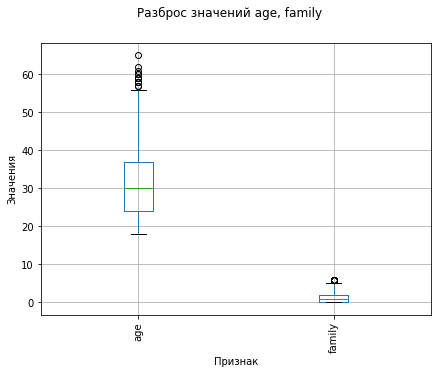

In [22]:
# построение диаграммы размаха
df[['age','family']].boxplot(figsize=(7,5))
plt.suptitle('Разброс значений age, family')
plt.title(None)
plt.xlabel('Признак'), plt.ylabel('Значения')
plt.xticks(rotation=90)
plt.show()

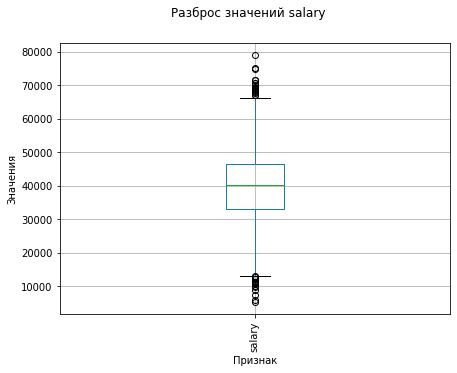

In [23]:
# построение диаграммы размаха
df[['salary']].boxplot(figsize=(7, 5))
plt.suptitle('Разброс значений salary')
plt.title(None)
plt.xlabel('Признак'), plt.ylabel('Значения')
plt.xticks(rotation=90)
plt.show()

Выбросы есть, однако они находятся в пределах нормальных значений, соответственно, их обработка не требуется.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод** 
    
В рамках работ по загрузке и анализу данных были проделаны следущие шаги:
    
1. Открыт и прочитан файл с выборкой.
2. Проведено переименование колонок в соответствии с правилами нотации Python (латиница, инжний регистр, змеиный стиль).
3. Изменены типы данных int64 и float64 на int32 для экономии памяти
4. Пропущенных значений в данных нет.
5. При проверке на явные дубликаты выявлены и удалены 153 строки с дубликатами (3% данных).
6. Данные проверены на адекватность и выбросы: данные адекватны, требующих обработки выбросов не выявлено.
 
</div>

## Умножение матриц

Докажем, что при умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится. Проверим, как связаны параметры линейной регрессии в исходной задаче (определение качества регресии на исходной матрице признаков) и в преобразованной (определение качества регресии на преобразованной путем умножения на обратимую матрицу матрице признаков).

Обозначения:

- $X$ — исходная матрица признаков

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии для матрицы Х до умножения на обратимую Р

- $w_p$ — вектор весов линейной регрессии для матрицы Х, умноженной на обратимую Р

**Ответ:** качество линейной регресии не изменится.

**Обоснование:** приведено ниже.

**Доказательство**

Рассмотрим формулу обучения для исходной матрицы признаков X:

$$
w = (X^T X)^{-1} X^T y
$$

Преобразуем ее для матрицы X, умноженной на обратимую матрицу P:

$$
w_p = ((XP^T) XP)^{-1} (XP)^T y
$$

Для доказательства неизменности качества регрессии и проверки взаимосвязи между параметрами в исходной и в преобразованной задачах осуществим ряд преобразований согласно свойств матриц:

$$
(AB)^T=B^T A^T; \;\;\;\; (AB)^{-1} = B^{-1} A^{-1}; \;\;\;\; (AB)C = A(BC)
$$

1. Раскроем скобки для транспонирования:

$$
w_p = (P^T X^T XP)^{-1} P^T X^T y 
$$

2. Воспользуемся свойством ассоциативности для вынесения одного из множителей:

$$
w_p = ((P^T X^T X)P)^{-1} P^T X^T y
$$

3. Раскроем скобки для нахождения обратных матриц:

$$
w_p = P^{-1}(P^T X^T X)^{-1} P^T X^T y
$$

4. Еще раз воспользуемся свойством ассоциативности для вынесения одного из множителей:

$$
w_p = P^{-1}(P^T (X^T X))^{-1} P^T X^T y
$$

5. Еще раз раскроем скобки для нахождения обратных матриц:

$$
w_p = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

6. Воспользуемся свойством единичной матрицы и сократим выражение $(P^T)^{-1} P^T$ (т.к. $(P^T)^{-1} P^T = E = 1$):

$$
w_p = P^{-1} (X^T X)^{-1} X^T y
$$

7. Получившаяся формула повторяет формулу обучения для исходной матрицы, приведенную выше, за исключением одного множителя - обратной к обратимой матрицы, на которую было произведено умножение исходной матрицы, что отражает взаимосвязь между параметрами в исходной и в преобразованной задачах:

$$
w_p = P^{-1} (X^T X)^{-1} X^T y
$$

$$
w = (X^T X)^{-1} X^T y
$$

Таким образом, качество регрессии при умножении исходной матрицы на случайно сгенерированную обратимую не изменится, и параметры исходной и преобразованной задач связаны как:

$$
w_p = P^{-1} w
$$

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод** 
    
На втором этапе работы проведено исследование формул предсказаний и обучения для исходной матрицы и матрицы, созданной путем умножения исходной матрицы на обратимую. С помощью свойств единичной матрицы доказано, что предсказания для этих матриц и их метрики качества будут одинаковыми. Вектор весов в преобразованной матрице при этом будет равен вектору весов исходной матрицы, умноженному на обратную к обратимой матрицу, использованную для преобразования исходной матрицы.
 
</div>

## Алгоритм преобразования

**Алгоритм**

Таким образом, с учетом изложенного выше, в качестве варианта преобразования данных, предотвращающего их хищение, может быть использовано умножение матрицы признаков на случайно сгенерированную обратимую матрицу.

**Обоснование**

Как было доказано в теории выше, качество линейной регрессии при этом не изменится, поскольку формулы расчета предсказаний для исходной и преобразованной матриц не отличаются.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод** 
    
В качестве способа защиты персональных данных клиентов банка от хищения предлагается использовать умножение исходной матрицы на произвольно сгенерированную обратимую матрицу, что позволит обеспечить сохранность данных и предотвратит искажение результатов линейной регресии.
 
</div>

## Проверка алгоритма

Проверим теоретические положения на практике, обучив модели и сделав предсказания для исходной и преобразованной выборок и оценив качество предсказаний с помощью метрики R2_score.

Разделим исходную матрицу на признаки и целевой признак.

In [24]:
# выделение признаков и оценка размера матрицы признаков
features = df.drop(['insurance_payments'], axis=1)
features.shape

(4847, 4)

In [25]:
# выделение целевого признака и оценка размера Series
target = df['insurance_payments']
target.shape

(4847,)

**Предсказание на данных исходной матрицы признаков**

Обучим модель на данных исходной матрицы, сделаем предсказание и оценим метрику R2_score.

In [26]:
model = LinearRegression()
model.fit(features,target)
predict = model.predict(features)
print("R2_score для исходной матрицы = ", r2_score(target, predict))

R2_score для исходной матрицы =  0.4302010046633359


**Предсказание на данных преобразованной матрицы признаков, полученной путем умножения исходной матрицы на произвольную обратимую матрицу**

Сгенерируем произвольную матрицу P и проверим ее обратимость.

In [27]:
# генерация произвольной матрицы с количеством строк, равным количеству столбцов исходной матрицы
P = np.random.normal(size=(4, 4))
P

array([[ 1.54009339, -0.56275259, -0.19969661, -0.96750962],
       [-1.91580674,  1.5267976 ,  0.83273011, -0.04376486],
       [-0.23693199,  0.49318984, -1.13812202,  0.61176294],
       [-0.92768683, -1.18461309,  1.31305198, -1.93032744]])

In [28]:
S = np.random.normal(size=(features.shape[1], features.shape[1]))
S

array([[-0.10416282, -0.7266792 , -0.12018899, -1.00436184],
       [-0.90927071, -0.17803174,  0.29812451,  1.23868677],
       [ 0.57509228, -1.72511801,  0.74404207,  0.42255298],
       [-0.50667051,  1.52069349, -1.14903273, -1.10774358]])

In [29]:
# проверка случайно сгенерированной матрицы на обратимость путем формирования обратной ей матрицы
P_inv = np.linalg.inv(P)
P_inv

array([[ 0.4040076 ,  0.02612159, -0.45096442, -0.3460075 ],
       [ 0.59601623,  0.63214088, -0.00511039, -0.31468409],
       [-0.19988631,  0.08389631, -1.05426869, -0.23583682],
       [-0.69589347, -0.34342091, -0.49727418, -0.31906531]])

In [30]:
# создание функции для проверки матрицы на обратимость на основании расчета определителя
def matrix_inversion(X):
    try: 
        np.linalg.inv(X)
        print("Матрица обратима, детерминант = ",np.linalg.det(X))
    except np.linalg.LinAlgError:
        print("Матрица необратима: либо она квадратная с детерминантом = 0, либо она неквадратная!")

In [31]:
# проверка на обратимость случайно сгенерированной матрицы
matrix_inversion(P)

Матрица обратима, детерминант =  5.811303638928014


Детерминант не равен 0, следовательно, матрица обратима и подходит для умножения. Умножим исходную матрицу на сгенерированную обратимую.

In [32]:
# умножение исходной матрицы признаков на случайно сгенерированную обратимую, вывод результата
features_transformed = features@P
features_transformed.head()

,0,1,2,3
0,-11829.762131,24523.067348,-56415.596986,30338.749460
1,-9092.470231,18810.261957,-43209.018187,23243.048080
2,-5031.130083,10401.263749,-23876.413282,12845.752488
3,-9922.151094,20595.709808,-47439.574868,25505.734740
4,-6236.027307,12914.442377,-29681.868020,15964.819720


In [33]:
model = LinearRegression()
model.fit(features_transformed,target)
predict = model.predict(features_transformed)
print("R2_score для преобразованной матрицы = ", r2_score(target, predict))

R2_score для преобразованной матрицы =  0.43020100466333466


<div style="border:solid blue 2px; padding: 20px"> 

**Вывод** 
    
На данном шаге произведена проверка теории на практике: сделан расчет и сравнение метрики качества R2_score для исходной и преобразованной путем умножения на случайную обратимую матрицу матриц; качественные метрики в обоих случаях одинаковы R2_score = 0.43
 
</div>

Для проверки корректности преобразования попробуем получить исходную матрицу признаков из преобразованной путем ее умножения на обратную матрицу к случайно сгенерированной матрице P_inv.

In [34]:
# вывод исходной матрицы признаков
features.head()

,gender,age,salary,family
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [35]:
# восстановление исходной матрицы признаков из преобразованной
features_restored = abs(features_transformed.dot(P_inv).round())
features_restored.head()

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


Значения признаков в столбцах исходной и восстановленной матриц признаков совпали, значит, преобразование работает корректно.

## Итоговый вывод

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод** 
    
В рамках исследования для решения задачи по преобразованию данных, затрудняющему доступ к данным, но при этом не искажающему качественные метрики линейной регрессии, была проделана следующая работа:
    
1.  Открыта и изучена выборка с данными, проведена их предобработка (переименование колонок, изменение типов данных, проверка на пропуски, удаление явных дубликатов - 153 строки, проверка на адекватность данных и выбросы).
2. Проверено и доказано предположение о том, что при умножении матрицы на произвольную обратимую матрицу соответствующей размерности качественные метрики предсказания не изменяются; определена зависимость между параметрами моделей (для исходной и преобразованной матриц).
3. Предложен алгоритм для шифрования данных, не ухудшающий качественные метрики предсказания: умножение исходной матрицы на произвольную обратимую матрицу.
4. Проведена проверка работы алгоритма на практике: расчитана и сверена метрика качества R2_score для исходной и преобразованной путем умножения на случайную обратимую матрицу матриц, R2_score = 0.43 в обоих случаях.  
 
</div>